In [15]:
import gzip
import json
from collections import Counter
import numpy as np
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt

# Summary of full-pass

In [3]:
with gzip.open("results/isoseq/ccs/Ad_Fe.zmw_metrics.json.gz") as f:
    data = json.load(f)

In [10]:
array = []

for zmw in data["zmws"]:
    # print(zmw)
    
    n = zmw["num_full_passes"]
    array.append(n)
    
    # break

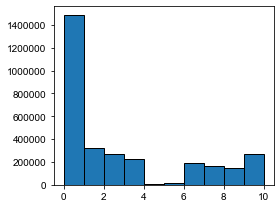

In [21]:
plt.figure(figsize=(4, 3))
plt.hist(array, range=(0, 10), edgecolor="black")
plt.tight_layout()
plt.show()

In [19]:
counter = Counter(array)
for k, v in list(sorted(counter.items()))[:20]:
    print(k, v, sep="\t")

0	1486601
1	325745
2	266660
3	222597
4	6513
5	19327
6	188373
7	167170
8	149863
9	139206
10	129658
11	122177
12	116004
13	110030
14	106226
15	102655
16	100441
17	100179
18	99669
19	99387


In [22]:
print(len(array))
counter[0] + counter[1] + counter[2] + counter[3]

5760192


2301603

# Plot HQ transcript length distribution

In [47]:
names = ["Ju_Mi", "Ad_Ma", "Ad_Fe"]
array = []
for name in names:
    lengths = []
    with gzip.open("results/isoseq/polished/%s.hq.fasta.gz" % name, "rt") as f:
        for read in SeqIO.parse(f, "fasta"):
            lengths.append(len(read))
    array.append(lengths)

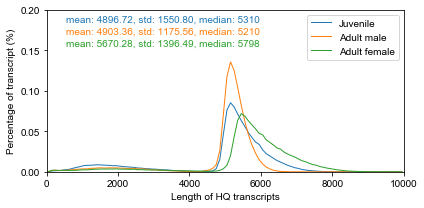

In [50]:
labels = ["Juvenile", "Adult male", "Adult female"]

plt.figure(figsize=(6, 3))

for i, lengths in enumerate(array):
    w = 100
    ys = np.zeros(int(10000 / w))
    xs = np.arange(len(ys)) * w + w / 2
    for v in lengths:
        j = int(v/w)
        if 0 <= j < len(ys):
            ys[j] += 1
    ys = ys * 100 / len(lengths) / w
    plt.plot(xs, ys, label=labels[i], lw=1)
    
    mean = np.mean(lengths)
    median = np.median(lengths)
    std = np.std(lengths)
    plt.text(min(xs) + (max(xs) - min(xs)) * 0.05, 
             0.2 - (i + 1) * 0.015, 
             "mean: %.2f, std: %.2f, median: %d" % (mean, std, median), 
             color="C%d" % i)
    
plt.xlim(0, len(ys) * w)
plt.ylim(0, 0.2)
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
plt.ylabel("Percentage of transcript (%)")
plt.xlabel("Length of HQ transcripts")
plt.legend()
plt.tight_layout()
plt.savefig("figures/length_of_hq_transcripts.png", dpi=300)